## 앙상블
- 단일 결정 트리의 단점을 극복하기 위해 여러 머신 러닝 모델을 연결하여 더 강력한 모델을 만드는 방법
- 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측 모형들을 조합하여 하나의 최종 예측 도형으로 만드는 것
- 대표적인 기법은 배깅, 부스팅, 랜덤포레스트

### 배깅
- 주어진 자료를 모집단으로 간주하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각각의 붓스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측 모형은 만드는 것
- 통계분류와 회귀분석에서 사용하는 머신러닝 알고리즘의 안정성과 정확도를 향상시키기 위해 고안한 학습법

In [65]:
import pandas as pd
## 유방암 데이터 로드하여 종양 예측하는 분류분석
breast = pd.read_csv('./data/breast-cancer.csv')
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

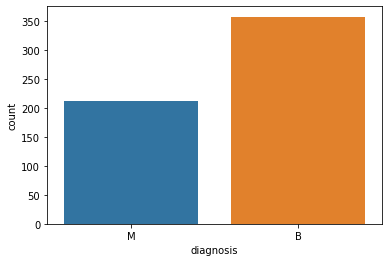

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
## 진단 데이터가 타깃데이터
## M이 악성 B는 양성
sns.countplot(x='diagnosis', data =breast)

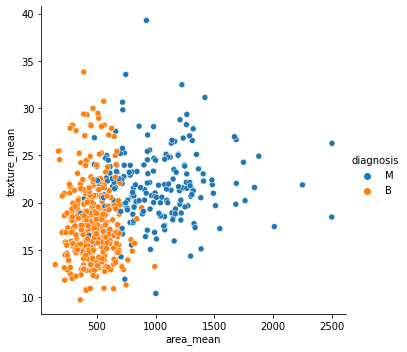

In [67]:
## 설명변수를 area_mean, texture_mean으로 설정 타깃변수를 diagnosis로 설정하여 산점도 그래프
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)

In [68]:
### 진단 데이터를 이산형으로 변경 M이면 1 아니면 0
### 데이터 분할
import numpy as np
from sklearn.model_selection import train_test_split
breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0)
features = ["area_mean", "area_worst"]
X = breast[features]
y = breast["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state =1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [69]:
## BaggingClassifier를 이용하여 분류기를 생성해 예측 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator =DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", clf.score(x_test, pred))

Accuracy Score :  1.0


In [70]:
## 혼동행렬을 반환하여 예측결과를 자세히 확인
from sklearn.metrics import confusion_matrix 
pd.DataFrame(confusion_matrix(y_test, pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],101,6
True[1],9,55


In [71]:
## oob_score를 이용하여 모델 평가
## oob_score를 true로 설정하면 기능을 사용 가능
## 검증세트나 교차검증을 하지 않아도 되는 장점
clf_oob=BaggingClassifier(base_estimator =DecisionTreeClassifier(),
                         oob_score=True)
oob=clf_oob.fit(X, y).oob_score_
print(oob)

0.9138840070298769


c:\Users\moons\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\moons\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [72]:
## 배깅 방식으로 회귀분석
## 자동차 데이터를 로드하여 자동차의 가격을 예측
car = pd.read_csv('./data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [73]:
## 데이터에서 연속형 변수들을 종속변수로 설정
## price 데이터는 타깃 데이터로 설정
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
print(X.shape, y.shape)

(205, 13) (205,)


In [74]:
##배깅을 이용해 회귀분석 모델을 생성하고 oob_score를 이용하여 모델 평가
## 평균 정확도가 90%
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(base_estimator =DecisionTreeRegressor(), oob_score=True)
reg=reg.fit(X, y)
reg.oob_score_

c:\Users\moons\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.8633395950336294

### 부스팅
- 예측력이 약한 모형들을 결합해 강한 예측 모형으로 만드는 방법

In [75]:
## 배깅에서 했던 유방암 데이터를 가지고 부스팅 실행
breast = pd.read_csv("./data/breast-cancer.csv")

In [76]:
## 설명 변수와 타깃 변수도 배깅과 같이 작업
breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0)
features = ["area_mean", "texture_mean"]
X = breast[features]
y = breast["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state =1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [77]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
pred=clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.9122807017543859


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(x_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))
print('F1\t{}%'.format(round(test_f1 *100,2)))

[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%
F1	87.8%


In [79]:
## 변수 중요도를 통해 예측에 사용된 변수들 중 타깃변수에 영향을 많이 준 변수가 무엇인지 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


In [80]:
## 부스팅 방식으로 회귀분석
## 배깅에서와 마찬가지로 차량 데이터 로드
car = pd.read_csv("./data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [81]:
## 모델의 예측력 확인
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(base_estimator =None)
pred=reg.fit(x_train, y_train).predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	6221211.287
MAE	1825.094
RMSE	2494.236
ACC	89.695%


In [82]:
## 변수의 중요도 확인
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.019181
1          carheight     0.003101
2          carlength     0.010996
3           carwidth     0.074639
4            citympg     0.019009
5   compressionratio     0.002970
6         curbweight     0.062739
7         enginesize     0.631786
8         highwaympg     0.065671
9         horsepower     0.061642
10           peakrpm     0.011266
11            stroke     0.011511
12         wheelbase     0.025489


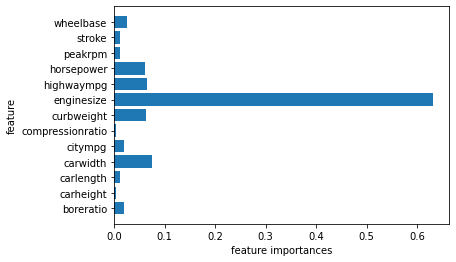

In [83]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align ='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

### 랜덤포레스트
- 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형결합하여 최종 학습기를 만드는 방법

In [84]:
## 유방암 데이터를 로드하여 랜덤포레스트로 수행
breast = pd.read_csv("./data/breast-cancer.csv")

breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0)
features = ["area_mean", "texture_mean"]
X = breast[features]
y = breast["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state =1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [85]:
## RandomForestClassifier를 이용하여 score 생성
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators =100, min_samples_split =5)
pred=clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.8947368421052632


In [86]:
pred=clf.predict(x_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[102   5]
 [ 13  51]]


정확도	89.47%
정밀도	91.07%
재현율	79.69%


In [87]:
## 변수 중요도 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean     0.684699
1  texture_mean     0.315301


In [88]:
car = pd.read_csv("./data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [89]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
pred=reg.fit(x_train, y_train).predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	4281960.652
MAE	1374.818
RMSE	2069.29
ACC	92.907%


In [90]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.005046
1          carheight     0.003352
2          carlength     0.005984
3           carwidth     0.016214
4            citympg     0.005019
5   compressionratio     0.003801
6         curbweight     0.176413
7         enginesize     0.678443
8         highwaympg     0.058329
9         horsepower     0.027048
10           peakrpm     0.007704
11            stroke     0.003909
12         wheelbase     0.008738


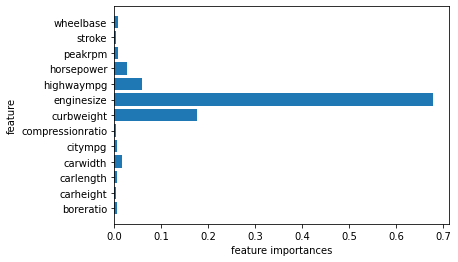

In [91]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align ='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()